<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_4)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-4_n250.csv',
 'data_multi_delta_-4_n120.csv',
 'data_multi_delta_-4_n60.csv',
 'data_multi_delta_-4_n30.csv',
 'data_multi_delta_-4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,95.476800,84.183788,63.096307,-0.000093,252.756802,252.756780,0.000022
1,0.0,1.0,52.150686,46.624257,56.531998,0.000271,165.307213,165.307225,-0.000012
2,0.0,2.0,31.046068,53.817741,66.673972,-0.000444,161.537337,161.538007,-0.000670
3,0.0,3.0,27.939465,73.887138,25.357003,0.000034,137.183640,137.183886,-0.000246
4,0.0,4.0,81.744835,90.910981,27.190549,0.000080,209.846444,209.846399,0.000046
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,86.308617,22.280063,51.177664,-0.002844,169.763500,169.766272,-0.002772
29996,999.0,26.0,70.450954,77.032384,47.378362,-0.000016,204.861683,204.861607,0.000076
29997,999.0,27.0,44.879446,43.931199,21.972813,-0.000509,120.782949,120.783779,-0.000830
29998,999.0,28.0,78.511238,88.028553,74.400383,-0.000093,250.940081,250.939837,0.000245


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,95.476800,84.183788,63.096307,-0.000093,252.756802,252.756780,0.000022
1,0.0,1.0,52.150686,46.624257,56.531998,0.000271,165.307213,165.307225,-0.000012
2,0.0,2.0,31.046068,53.817741,66.673972,-0.000444,161.537337,161.538007,-0.000670
3,0.0,3.0,27.939465,73.887138,25.357003,0.000034,137.183640,137.183886,-0.000246
4,0.0,4.0,81.744835,90.910981,27.190549,0.000080,209.846444,209.846399,0.000046
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,86.308617,22.280063,51.177664,-0.002844,169.763500,169.766272,-0.002772
29996,999.0,26.0,70.450954,77.032384,47.378362,-0.000016,204.861683,204.861607,0.000076
29997,999.0,27.0,44.879446,43.931199,21.972813,-0.000509,120.782949,120.783779,-0.000830
29998,999.0,28.0,78.511238,88.028553,74.400383,-0.000093,250.940081,250.939837,0.000245


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    95.476800  84.183788  63.096307  ...  252.756802  252.756780  0.000022
      1.0    52.150686  46.624257  56.531998  ...  165.307213  165.307225 -0.000012
      2.0    31.046068  53.817741  66.673972  ...  161.537337  161.538007 -0.000670
      3.0    27.939465  73.887138  25.357003  ...  137.183640  137.183886 -0.000246
      4.0    81.744835  90.910981  27.190549  ...  209.846444  209.846399  0.000046
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   86.308617  22.280063  51.177664  ...  169.763500  169.766272 -0.002772
      26.0   70.450954  77.032384  47.378362  ...  204.861683  204.861607  0.000076
      27.0   44.879446  43.931199  21.972813  ...  120.782949  120.783779 -0.000830
      28.0   78.511238  88.028553  74.400383  ...  250.940081  250.939837  0.000245
      29.0   34.638070  22.834861  37.464831  ...  104.938010  104.938118 -0.000109

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    95.476800  84.183788  63.096307  ...  252.756802  252.756780  0.000022
      1.0    52.150686  46.624257  56.531998  ...  165.307213  165.307225 -0.000012
      2.0    31.046068  53.817741  66.673972  ...  161.537337  161.538007 -0.000670
      3.0    27.939465  73.887138  25.357003  ...  137.183640  137.183886 -0.000246
      4.0    81.744835  90.910981  27.190549  ...  209.846444  209.846399  0.000046
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   86.308617  22.280063  51.177664  ...  169.763500  169.766272 -0.002772
      26.0   70.450954  77.032384  47.378362  ...  204.861683  204.861607  0.000076
      27.0   44.879446  43.931199  21.972813  ...  120.782949  120.783779 -0.000830
      28.0   78.511238  88.028553  74.400383  ...  250.940081  250.939837  0.000245
      29.0   34.638070  22.834861  37.464831  ...  104.938010  104.938118 -0.000109

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,95.476800,84.183788,63.096307,-0.000093,252.756802,252.756780,0.000022
1,0.0,1.0,52.150686,46.624257,56.531998,0.000271,165.307213,165.307225,-0.000012
2,0.0,2.0,31.046068,53.817741,66.673972,-0.000444,161.537337,161.538007,-0.000670
3,0.0,3.0,27.939465,73.887138,25.357003,0.000034,137.183640,137.183886,-0.000246
4,0.0,4.0,81.744835,90.910981,27.190549,0.000080,209.846444,209.846399,0.000046
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,86.308617,22.280063,51.177664,-0.002844,169.763500,169.766272,-0.002772
29996,999.0,26.0,70.450954,77.032384,47.378362,-0.000016,204.861683,204.861607,0.000076
29997,999.0,27.0,44.879446,43.931199,21.972813,-0.000509,120.782949,120.783779,-0.000830
29998,999.0,28.0,78.511238,88.028553,74.400383,-0.000093,250.940081,250.939837,0.000245


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    95.476800  84.183788  63.096307  ...  252.756802  252.756780  0.000022
      1.0    52.150686  46.624257  56.531998  ...  165.307213  165.307225 -0.000012
      2.0    31.046068  53.817741  66.673972  ...  161.537337  161.538007 -0.000670
      3.0    27.939465  73.887138  25.357003  ...  137.183640  137.183886 -0.000246
      4.0    81.744835  90.910981  27.190549  ...  209.846444  209.846399  0.000046
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   86.308617  22.280063  51.177664  ...  169.763500  169.766272 -0.002772
      26.0   70.450954  77.032384  47.378362  ...  204.861683  204.861607  0.000076
      27.0   44.879446  43.931199  21.972813  ...  120.782949  120.783779 -0.000830
      28.0   78.511238  88.028553  74.400383  ...  250.940081  250.939837  0.000245
      29.0   34.638070  22.834861  37.464831  ...  104.938010  104.938118 -0.000109

[30000 rows x 7 columns]

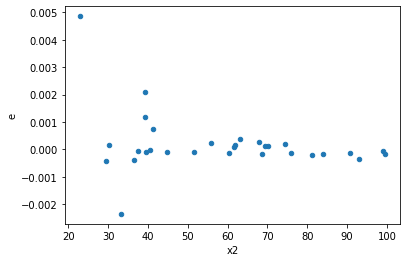

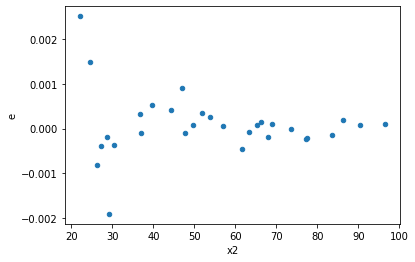

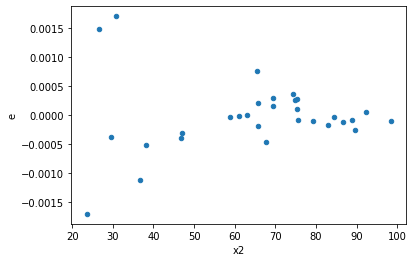

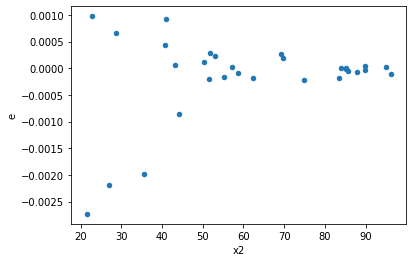

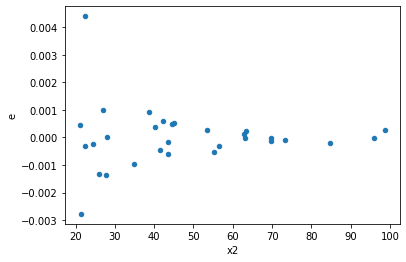

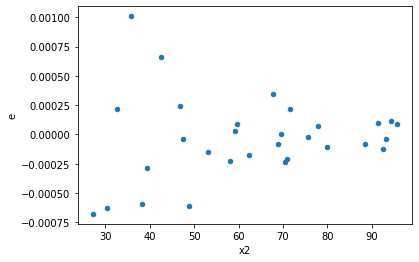

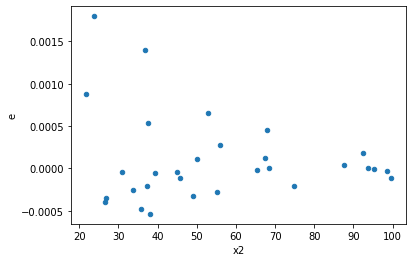

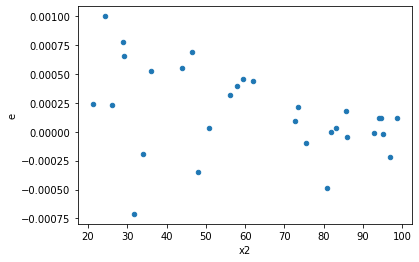

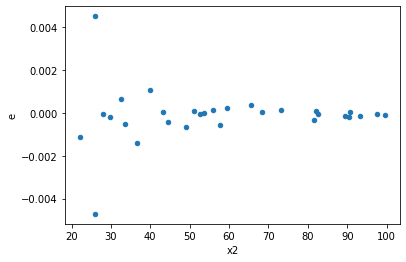

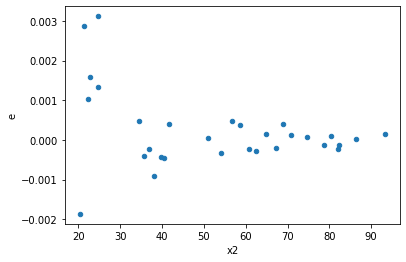

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,4.710275762890014e-06,1.0415011941892287e-07,5.23363973654446e-07,1.1572235490991429e-08,0.022111257315223728,4.008153547073844e-06,Reject005=0 : Heteroscedasticity
1.0,9.0,9.0,8.314711099325e-06,2.009137131387543e-07,9.238567888138889e-07,2.2323745904306033e-08,0.024163643299051577,5.888629268067424e-06,Reject005=0 : Heteroscedasticity
2.0,9.0,9.0,6.204435513980303e-06,3.035466320414604e-07,6.893817237755892e-07,3.3727403560162265e-08,0.04892413360691495,0.00011817212123643485,Reject005=0 : Heteroscedasticity
3.0,9.0,9.0,3.7018015329406935e-06,3.536660606834877e-07,4.113112814378548e-07,3.9296228964831966e-08,0.09553890383813664,0.0017474384663466922,Reject005=0 : Heteroscedasticity
4.0,9.0,9.0,3.740027936281476e-06,2.2094912148984934e-07,4.155586595868307e-07,2.4549902387761036e-08,0.05907686393100263,0.00025727485093750806,Reject005=0 : Heteroscedasticity
5.0,9.0,9.0,1.1910730996036434e-05,8.537106680990842e-08,1.3234145551151593e-06,9.485674089989824e-09,0.007167575763260675,2.8079719502933446e-08,Reject005=0 : Heteroscedasticity
6.0,9.0,9.0,2.6595762296163393e-05,7.057500294557621e-08,2.95508469957371e-06,7.841666993952912e-09,0.0026536183531673807,3.31778839673882e-10,Reject005=0 : Heteroscedasticity
7.0,9.0,9.0,1.9240317077649065e-05,1.9639908289346236e-07,2.1378130086276737e-06,2.182212032149582e-08,0.01020768431730336,1.348216658131688e-07,Reject005=0 : Heteroscedasticity
8.0,9.0,9.0,2.633777626873778e-06,2.401588165980931e-07,2.926419585415309e-07,2.6684312955343675e-08,0.09118416609953325,0.0014583063515879447,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    992
Reject005=1 : Homoscedasticity        8
Name: Result_test, dtype: int64